In [1]:
# Binary classification ejemplo
# Utilizamos el IMBD dataset

# pag. 68 "Deep learning with Python"


# Para evita rproblemas de compatibilidad, usar
# tensowflow 1.13.1 
# numpy 1.18.5
# keras 2.1.5

# comandos para rebajar versiones (para alternativa 1):
# !pip install tensorflow==1.13.1
# pip install keras==2.1.5 install numpy==1.18.5


In [2]:
# Carga del dataset

# ALTERNATIVA 1

# Veamos info del dataset:
# https://keras.io/api/datasets/imdb/

from keras.datasets import imdb


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Debido a problemas de compataibilidad entre paquetes, utilizamos este truco
# https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words significa que vamos a utilizar las 10,000 palabras mas frecuentes en el set de entrenamiento.
# Palabras raras serán descartadas. Esto ademas no spermite trabajar con un vector de datos manejable.


# restore np.load for future normal usage
np.load = np_load_old
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# Como hemos restringido a las 10000 palabras mas frecuentes, ningun indice de palabra debe exceder 10000.
# esto lo verificamos asi: 
# esto nos data una lista de los indices maximos en cada comentario.

print(type([max(sequence) for sequence in train_data]))

# Encontramos el maximo de todos los indices. 
max([max(sequence) for sequence in train_data])


<class 'list'>


9999

In [3]:
# Carga del dataset

# ALTERNATIVA 2
# 

# Veamos info del dataset:
# https://keras.io/api/datasets/imdb/

#import tensorflow as tf

#import matplotlib.pyplot as plt

#layers = tf.keras.layers

#import numpy as np
#print('Tensorflow Version ', tf.__version__)




#imdb_data = tf.keras.datasets.imdb
#(train_data, train_labels), (test_data, test_labels) = imdb_data.load_data(num_words=10000)

# num_words significa que vamos a utilizar las 10,000 palabras maás frecuentes en el set de entrenamiento.
# Palabras raras serán descartadas. Esto ademas no spermite trabajar con un vector de datos manejable.

In [4]:
# train_data y test_data son listas de comentarios. Cada comentario es una lista con índices de palabras (una
# codificación de palabras).

# train_labels y test_labels con listas de 0s y 1s  (variable clase) donde 0 es negativo y 1 es positivo.

train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
# esto nos da la máxima cantidad de palabras que vamos a utilizar como atributos de entrada.

max([max(sequence) for sequence in train_data])

9999

In [8]:
# (opcional)
# decodificacion de un de estos comentarios en ingles.


word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [9]:
# lista de las palabras
#word_index

#reverse_word_index

decoded_review
#print(decoded_review[0])
#print(decoded_review[1])
#print(decoded_review[2])
#print(decoded_review[3])


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
# Preparación de los datos:
# Tenemos que convertir los datos de la dataset en tensores, es decir, en un formato de matriz para que sea
# leido por la capa de entrada (embedding layer) de la red neurona.

# Para cada comentario (sample) creamos un tensor (vector) que contiene el id de la muestra (sample) y 
# además las palabras (word_indices) codificadas numericamente.


import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
# ahora vectorizamos las clases:


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [15]:
# Ahora construimos nuestra ANN

# ver nn_imdb_dataset_nn design.pptx

# alternativa I
from keras import models
from keras import layers
# estructura del modelo
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Recordemos que sin funcion de activacion, la red neuronal seria un clasificador lineal
# que divide el espacio de entrada en planos multidimensionales del tipo:
#  output = W * inputs + b

# En este caso, la capa solo aprende los pesos para llevar a cabo transformaciones lineales
# de la informacion de entrada. El "espacio de hipotesis" de la capa seria el conjunto posible
# de transformaciones lineales a los datos de netrada en un espacio con 16 dimensiones..
# Tal espacio de hipotesis es demasiado restrictivo considerando la nolinealidad intrinseca
# potencial de los datos. Aun asi si agregamos mas capas no no sbeneficiariamos.

# Para acceder a un espacio de hipotesis mas rico, necesitamos lograr no-linealidad, y eso
# lo logramos con funcion de activacion. En el caso de RELU, es la mas popular en deep learning 
# y se sabe que da bueno resultados para problemas de clasificacion.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# alternativa II
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#model = Sequential()
#model.add(Dense(16, input_shape=(10000,), activation='relu' ))
#model.add(Dense(16, activation='relu' ))
#model.add(Dense(1, activation='sigmoid' ))







Instructions for updating:
Colocations handled automatically by placer.


In [56]:
# Loss function y optimizer

# compilacion

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
# configuracion del optimizer


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Ahora necesitamos seleccioanr una funcion de perdida y un optimizados. Dado que es un problema de 
# clasificaciones y la salida de la red es una "probabilidad" (1 sola neurona con activacion sigmoide)
# seria mejor usar  la funcion de "entropia cruzada binaria (binary cross-entropy)".
# La entropia cruzada es una cantida que tiene su fundamento en la teoria de la informacion y  basicamente
# mide la distancia entre distribuciones de probabilidad, o en este caso, entre la distribucion real
# de lo datos y de las predicciones que ofrece la maquina.

# Aqui configuramos el optimizer rmsprop y la loss function binary_crossentropy. Note que vamos
# a monitorear el accuracy.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# alternativa I 
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# https://stackoverflow.com/questions/62465620/error-keras-requires-tensorflow-2-2-or-higher
# La version de Keras que tengo es la 2.4.3. Si bajo a la 2.3.1 alternativa I es valida.

# alternativa II 
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop
# https://www.tensorflow.org/tutorials/quickstart/advanced
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
#model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:

# Alternativa I
from keras import losses
from keras import metrics

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Quizas quisieramos configurar los parametros del optimizador, o utilizar una funcion de perdida
# a nuestra medida. En el primer caso, podemos utilizar una clase como argumento del optimizador:

# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# En el segundo caso, podemos pasar el objeto de la funcion como argumento loss / metrics:
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])    
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 




model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])




# no ejecutar
# uso de función de perdida a la medida y metricas
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_accuracy
#mtr = tf.keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)
#model.compile(optimizer = opt, loss='binary_crossentropy', metrics= mtr)


#model.compile(optimizer = opt, loss='binary_crossentropy', metrics='binary_accuracy')

#model.compile(optimizer = opt, loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])




In [18]:
# validacion de nuestro modelo


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Para poder monitorear el accuracy en el entrenamiento por primera vez, podemos crear un set
# de datos de validacion y dejarlos aparte de las 10000 muestras originales:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# generamos las muestras
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [19]:

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Ahora entrenamos el modelo en 20 epochs (en 20 iteraciones sobre todas las muestras en 
# x_train y y_train), en mini-lotes de 512 muestras. AL mismo tiempo, vamos a monitorear
# el loss y el accuracy sobre las 10000 muestras que dejamos aparte.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# entrenamiento de la red
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.5085 - acc: 0.7815 - val_loss: 0.3797 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2179 - acc: 0.9281 - val_loss: 0.3081 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1750 - acc: 0.9435 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1426 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1151 - acc: 0.9651 - val_loss: 0.3145 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - l

In [20]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Como vemos esto nos toma unos cuantos segundos . Al final de cada epoch, ocurre una 
# pausa dado que se calcula el loss y el accuracy sobre estas 10000 muestras de los 
# datos de validacion.

# Note que mode.fit() devuelve un objeto History. Este objeto tiene miembros, que son
# el diccionaro que contiene los datos de todo lo que ha ocurrido durante el entrenamiento.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


history_dict = history.history
history_dict.keys()


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# El diccionario tiene 4 entradas. 'val_loss', 'val_acc', 'loss', 'acc'
# Vamos a plotear el loss del entrenamiento y validacion en la misma grafica, asi tambien
# el accuracy de entrenamiento y validacion.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

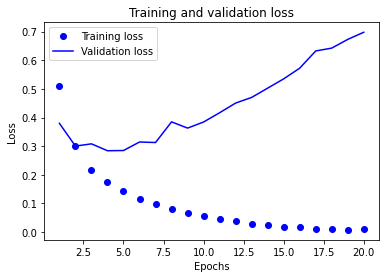

In [22]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')


plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

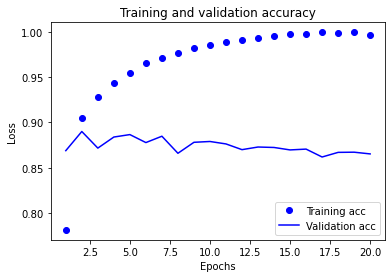

In [25]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Como podemos ver el loss del entrenamiento va disminuyendo en cada iteracion, y el accuracy
# del entrenamiento hace lo contrario. Eso es lo que tenemos que esperar al utilizar la 
# optimizacion gradient-descent.

# Sin embargo, no ocurre lo mismo para el loss y el accuracy en el set de validacion: 
# Ambos tienen comportamientos distintos. ¿por que ocurre esto?
# RESPUESTA!  PORQUE UN MODELO QUE SE DESEMPEÑA BIEN EN EL SET DE ENTRENAMIENTO NO TIENE
# QUE HACERLO TAMBIEN EN EL DE VALIDACION--->  ESTO SE DENOMINA OVERFITTING.
# El modelo ha sido optimizado para el set de entrenamiento pero no se generaliza para
# datos que esten fuera de ese set.

# Mas adelante veremos tecnicas para prevenir esto.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


In [26]:
#  RE-ENTRENAMIENTO DEL MODELO DESDE CERO.
# Entrenemos una nueva red desde cero, para 4 iteraciones y luego evaluemos sobre el 
# set de datos de testeo.

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# Vemos que results

Epoch 1/4
25000/25000 [==============================] - 4s 155us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 5s 190us/step


[0.3238498728275299, 0.87312]

In [27]:
# vemos que logramos un accuracy de 87%, no es malo, aunque es posible mejorarlo.

# Teniendo nuestra red entrenada, quisieramos utilizarla para nuevas instancias. El modelos nos 
# puede entregar un likelihood de que el comentario de una pelicula sea positivo utilizando "predict":

model.predict(x_test)

array([[0.13560814],
       [0.999712  ],
       [0.278258  ],
       ...,
       [0.07140881],
       [0.04283339],
       [0.473888  ]], dtype=float32)

In [ ]:
# Otras cosas que Ud. puede experimentar para convencerse de que la arquitectura 
# de la red es razonable:

# 1. Hemos utilizado 2 capas escondidas. Intentemos utilizar solo 1 o 3 capas y veamos
# los efectos sobre loss y accuracy

# 2. Intentar utilizar capas con mas unidades escondidas: 32 unidades y 64.

# 3. Intentar utilizar la funcion de activacion "tanh", la cual era bastante popular al 
# inicio de las redes neuronales, en vez de relu.